Import the SciPy input output package to get the function that imports the `.mat` file, and import the NumPy package to manipulate the data.

In [1]:
import scipy.io as sio
import numpy as np

Import the first MatLab file from the `Robot.zip` file from the [data repository](https://data.mendeley.com/datasets/gpsjkbp6h4/1) for the paper.

In [2]:
test = sio.loadmat("data_m22_day1.mat")

Based on the printout, this is a MatLab 5.0 `.mat` file. The `.loadmat` command loads a dictionary, and the `'dataMouse'` has the data we want. As described from the Mendeley data [page](https://data.mendeley.com/datasets/gpsjkbp6h4/1) there are five arrays:
> Each .zip file refers to a different mouse group. Groups are defined accordingly to the paper. A .zip file contains a .mat file (matlab) associated to each mouse and each day of recording. The .mat files are "structure arrays" containing the following fields:
- force: vector (time x 1), force applied by the mouse to the handle;
- status: vector (time x 1), discrete codification of the current phase of the passive extension and active retraction cycle, see Table S1 in the Supporting Information of the paper;
- index: vector (pixels x 1), position of pixels in the 200x200 matrix of the recorded calcium;
- calcium: matrix (time x pixels), calcium fluorescence;
- day: number, relative day from lesion.

In [3]:
print(test)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Oct 15 10:48:37 2020', '__version__': '1.0', '__globals__': [], 'dataMouse': array([[(array([[-0.02927687],
               [-0.02794236],
               [-0.03791983],
               ...,
               [-0.01703624],
               [-0.01767177],
               [-0.022116  ]]), array([[0],
               [0],
               [0],
               ...,
               [3],
               [3],
               [3]], dtype=uint8), array([[20868],
               [20869],
               [20870],
               ...,
               [27926],
               [27927],
               [27928]], dtype=uint16), array([[ 5394,  4969,  4707, ..., 14570, 14234, 14019],
               [ 5554,  5123,  4820, ..., 14965, 14879, 14484],
               [ 5530,  5170,  4878, ..., 14723, 14656, 14287],
               ...,
               [ 5219,  4859,  4665, ..., 14472, 14265, 13924],
               [ 5332,  4982,  4747, ..., 14344, 14128, 13875

In the following cell, a new variable holds only the data. The labels for the arrays are accessible through `.dtype`.

In [4]:
test_data = test["dataMouse"]
print(test_data)
print(test_data.dtype)

[[(array([[-0.02927687],
         [-0.02794236],
         [-0.03791983],
         ...,
         [-0.01703624],
         [-0.01767177],
         [-0.022116  ]]), array([[0],
         [0],
         [0],
         ...,
         [3],
         [3],
         [3]], dtype=uint8), array([[20868],
         [20869],
         [20870],
         ...,
         [27926],
         [27927],
         [27928]], dtype=uint16), array([[ 5394,  4969,  4707, ..., 14570, 14234, 14019],
         [ 5554,  5123,  4820, ..., 14965, 14879, 14484],
         [ 5530,  5170,  4878, ..., 14723, 14656, 14287],
         ...,
         [ 5219,  4859,  4665, ..., 14472, 14265, 13924],
         [ 5332,  4982,  4747, ..., 14344, 14128, 13875],
         [ 5260,  4929,  4850, ..., 14577, 14157, 13942]], dtype=uint16), array([[-14]], dtype=int16))]]
[('force', 'O'), ('status', 'O'), ('index', 'O'), ('calcium', 'O'), ('day', 'O')]


Use the labels from the `dtype` attribute of the data to select it from the overall data structure.

In [5]:
test_data_force = test_data["force"]
print(test_data_force)
print(test_data_force[0])
print(test_data_force[0][0])
print(test_data_force[0][0][0])

[[array([[-0.02927687],
         [-0.02794236],
         [-0.03791983],
         ...,
         [-0.01703624],
         [-0.01767177],
         [-0.022116  ]])]]
[array([[-0.02927687],
        [-0.02794236],
        [-0.03791983],
        ...,
        [-0.01703624],
        [-0.01767177],
        [-0.022116  ]])]
[[-0.02927687]
 [-0.02794236]
 [-0.03791983]
 ...
 [-0.01703624]
 [-0.01767177]
 [-0.022116  ]]
[-0.02927687]


Flatten the first three arrays so that it's easier to slice them.

In [6]:
force = test['dataMouse'][0][0][0].flatten()
status = test['dataMouse'][0][0][1].flatten()
index = test['dataMouse'][0][0][2].flatten()
calcium = test['dataMouse'][0][0][3] 
day = test['dataMouse'][0][0][4]

force.shape, status.shape, index.shape, calcium.shape, day

((10000,), (10000,), (2196,), (10000, 2196), array([[-14]], dtype=int16))

#### Interpreting our slices / Slicing tips

In the calcium array, each row represents the calcium fluorescence of **each** pixel at **one time point**. This is evident by the shape of array, made out of 2196 data points.

In [7]:
print(calcium[0].shape)

(2196,)


Slicing like this gives you the calcium fluorescence of all time points in **one pixel**.

In [8]:
calcium[:, 0].shape

(10000,)

Slicing like this gives you the calcium fluorescence of all pixels in the first 5000 time points.

In [9]:
calcium[: 5000, :].shape

(5000, 2196)

Slicing like this gives you the calcium fluorescence of all pixels at the **last** time point.

In [10]:
calcium[-1, :].shape

(2196,)

Slicing like this gives you the calcium fluorescence of each pixel of every **fifth** time point.

In [11]:
calcium[::5, :].shape ## [start:end:interval]

(2000, 2196)

Using negative numbers as the interval flips the array around.

In [12]:
a = np.arange(10)
a, a[::2], a[::-1]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 2, 4, 6, 8]),
 array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0]))

#### Examining the index array

In [15]:
for i in index:
    print (i)

20868
20869
20870
20871
20872
20873
20874
20875
20876
20877
20878
20879
20880
20881
20882
20883
20884
20885
20886
20887
20888
20889
20890
20891
20892
20893
20894
20895
20896
20897
20898
20899
20900
20901
20902
20903
20904
20905
20906
20907
20908
20909
20910
20911
20912
20913
20914
20915
20916
20917
20918
20919
20920
20921
20922
20923
20924
20925
20926
20927
20928
21068
21069
21070
21071
21072
21073
21074
21075
21076
21077
21078
21079
21080
21081
21082
21083
21084
21085
21086
21087
21088
21089
21090
21091
21092
21093
21094
21095
21096
21097
21098
21099
21100
21101
21102
21103
21104
21105
21106
21107
21108
21109
21110
21111
21112
21113
21114
21115
21116
21117
21118
21119
21120
21121
21122
21123
21124
21125
21126
21127
21128
21268
21269
21270
21271
21272
21273
21274
21275
21276
21277
21278
21279
21280
21281
21282
21283
21284
21285
21286
21287
21288
21289
21290
21291
21292
21293
21294
21295
21296
21297
21298
21299
21300
21301
21302
21303
21304
21305
21306
21307
21308
21309
21310
21311
2131

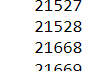

Running a `for` loop to print every element of the index reveals that some pixels in the 200x200 matrix have been skipped. Here is an example: the indices between -528 and -668 (non-inclusive) are skipped.

Here, another data set from another mouse from another day is loaded. While there remains the same number of pixels, the number of time points is not 10,000 as seen from the other data set.

In [16]:
test2 = sio.loadmat("data_m25_day20.mat")
force2 = test2['dataMouse'][0][0][0].flatten()
status2 = test2['dataMouse'][0][0][1].flatten()
index2 = test2['dataMouse'][0][0][2].flatten()
calcium2 = test2['dataMouse'][0][0][3] 
day2 = test2['dataMouse'][0][0][4]

force2.shape, status2.shape, index2.shape, calcium2.shape, day2

((3524,), (3524,), (2196,), (3524, 2196), array([[27]], dtype=uint8))

The `np.isin` function is used to check whether the indices of these two data sets match. The fact that no "false" is returned in the resulting Boolean array means that the indices do match.

In [21]:
test_bool = np.isin(index, index2)
for i in range(len(test_bool)):
    if test_bool[i] == False:
        print("false")
    else:
        print("matches")

matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
matches
